In [20]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [21]:
file=r'/content/sample_data/mice_imputed.csv'
df=pd.read_csv(file)

In [22]:
df

,Unnamed: 0,FireSeason,Month,individual_fire_num,PrepLevel,day0_F_min,day0_F_mean,day0_F_max,day0_IN_Sea_level,day0_F_Mean_dew_point,day0_IN_tot_rain,day0_MI_visibilty,day0_MPH_mean_wind_speed,day0_MPH_max_sustained_wind,day0_MPH_max_wind,day1_F_min,day1_F_mean,day1_F_max,day1_IN_Sea_level,day1_F_Mean_dew_point,day1_IN_tot_rain,day1_MI_visibilty,day1_MPH_mean_wind_speed,day1_MPH_max_sustained_wind,day1_MPH_max_wind,day2_F_min,day2_F_mean,day2_F_max,day2_IN_Sea_level,day2_F_Mean_dew_point,day2_IN_tot_rain,day2_MI_visibilty,day2_MPH_mean_wind_speed,day2_MPH_max_sustained_wind,day2_MPH_max_wind,day3_F_min,day3_F_mean,day3_F_max,day3_IN_Sea_level,day3_F_Mean_dew_point,day3_IN_tot_rain,day3_MI_visibilty,day3_MPH_mean_wind_speed,day3_MPH_max_sustained_wind,day3_MPH_max_wind,day4_F_min,day4_F_mean,day4_F_max,day4_IN_Sea_level,day4_F_Mean_dew_point,day4_IN_tot_rain,day4_MI_visibilty,day4_MPH_mean_wind_speed,day4_MPH_max_sustained_wind,day4_MPH_max_wind,Fire_Severity
0,1,1993,5,62,1,34.0,43.9,53.1,29.86,37.3,0.00,26.8,8.75,13.81,17.26,34.9,42.0,52.0,29.55,32.9,0.00,31.4,11.62,17.26,20.71,29.8,36.9,44.1,29.83,28.7,0.00,35.1,9.09,16.11,19.56,23.9,30.4,37.9,30.12,22.2,0.00,28.2,10.24,14.96,17.26,23.0,27.4,41.9,29.97,21.3,0.00,17.9,13.00,16.11,20.71,Small
1,2,1993,5,10,1,38.8,48.1,55.9,30.07,39.7,0.00,29.8,8.75,12.77,19.68,34.0,43.9,53.1,29.86,37.3,0.00,26.8,8.75,13.81,24.17,34.9,42.0,52.0,29.55,32.9,0.00,31.4,11.62,17.26,20.71,29.8,36.9,44.1,29.83,28.7,0.00,35.1,9.09,16.11,19.56,23.9,30.4,37.9,30.12,22.2,0.00,28.2,10.24,14.96,16.11,Small
2,3,1993,5,28,1,42.1,49.0,59.9,29.93,42.0,0.00,39.4,9.67,14.96,17.26,45.9,53.0,59.0,29.79,39.9,0.00,53.4,11.28,19.68,20.71,32.9,44.8,55.9,29.98,35.2,0.12,36.0,9.09,14.96,16.11,38.8,46.1,57.0,29.99,38.7,0.08,24.9,10.93,22.79,26.47,38.8,48.1,55.9,30.07,39.7,0.00,29.8,8.75,12.77,17.26,Large
3,4,1993,5,20,2,39.9,49.2,60.1,29.57,37.8,0.00,32.5,15.08,21.86,26.47,36.0,42.4,54.9,30.03,34.5,0.12,32.3,12.89,20.83,25.32,42.1,49.3,61.0,29.97,39.3,0.13,33.7,13.12,18.30,20.71,38.8,45.3,55.0,30.18,36.8,0.00,36.0,8.17,13.81,16.11,42.1,49.0,59.9,29.93,42.0,0.00,39.4,9.67,14.96,17.26,Small
4,5,1993,5,20,1,43.0,50.7,56.8,29.88,40.5,0.01,38.1,12.77,21.86,21.86,41.0,50.3,55.9,29.97,39.4,0.05,41.8,9.32,17.26,25.32,43.9,50.7,61.0,29.49,37.1,0.04,31.7,14.38,20.83,25.32,39.9,49.2,60.1,29.57,37.8,0.00,32.5,15.08,21.86,26.47,36.0,42.4,54.9,30.03,34.5,0.12,32.3,12.89,20.83,25.32,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,3244,2019,9,1,1,32.0,43.3,52.0,29.89,37.6,0.28,9.4,18.87,36.94,48.33,32.0,40.1,51.1,29.87,34.9,0.00,10.0,9.67,18.30,29.92,37.0,43.6,53.1,29.48,37.1,0.01,10.0,8.75,17.26,24.17,27.0,44.6,53.1,29.44,41.1,0.16,10.0,13.46,23.02,26.35,27.0,39.0,50.0,29.59,32.8,0.00,8.9,10.36,23.02,33.26,Large
3244,3245,2019,9,0,1,32.0,41.1,53.6,30.24,35.5,0.02,10.0,9.55,19.68,27.73,32.0,43.3,52.0,29.89,37.6,0.28,9.4,18.87,36.94,48.33,32.0,40.1,51.1,29.87,34.9,0.00,10.0,9.67,18.30,28.77,37.0,43.6,53.1,29.48,37.1,0.01,10.0,8.75,17.26,24.17,27.0,44.6,53.1,29.44,41.1,0.16,10.0,13.46,23.02,26.35,Severe
3245,3246,2019,9,0,1,46.0,48.3,53.1,30.21,40.5,0.00,10.0,14.27,19.68,28.88,32.0,41.1,53.6,30.24,35.5,0.02,10.0,9.55,19.68,27.73,32.0,43.3,52.0,29.89,37.6,0.28,9.4,18.87,36.94,48.33,32.0,40.1,51.1,29.87,34.9,0.00,10.0,9.67,18.30,25.32,37.0,43.6,53.1,29.48,37.1,0.01,10.0,8.75,17.26,26.47,Small
3246,3247,2019,10,20,1,37.0,43.2,53.1,29.97,37.7,0.00,10.0,9.55,12.77,21.86,41.0,45.2,52.0,29.84,41.9,0.05,10.0,8.98,17.26,25.32,45.0,48.3,53.1,29.62,46.4,0.52,4.8,10.01,25.32,37.98,45.0,48.7,55.0,30.00,43.8,0.04,10.0,8.63,20.83,27.73,46.0,48.3,53.1,30.21,40.5,0.00,10.0,14.27,19.68,28.88,Small


In [23]:
df = df.drop(['Unnamed: 0','FireSeason','individual_fire_num'], axis=1)

In [24]:
label_col = df.pop('Fire_Severity')
df.insert(0, 'label', label_col)
print(df.head())

   label  Month  ...  day4_MPH_max_sustained_wind  day4_MPH_max_wind
0  Small      5  ...                        16.11              20.71
1  Small      5  ...                        14.96              16.11
2  Large      5  ...                        12.77              17.26
3  Small      5  ...                        14.96              17.26
4  Small      5  ...                        20.83              25.32

[5 rows x 53 columns]


In [25]:
print(df.columns.values.tolist())
columns_list=df.columns.values.tolist()
columns_xlist=columns_list[1:]
print(columns_xlist)

['label', 'Month', 'PrepLevel', 'day0_F_min', 'day0_F_mean', 'day0_F_max', 'day0_IN_Sea_level', 'day0_F_Mean_dew_point', 'day0_IN_tot_rain', 'day0_MI_visibilty', 'day0_MPH_mean_wind_speed', 'day0_MPH_max_sustained_wind', 'day0_MPH_max_wind', 'day1_F_min', 'day1_F_mean', 'day1_F_max', 'day1_IN_Sea_level', 'day1_F_Mean_dew_point', 'day1_IN_tot_rain', 'day1_MI_visibilty', 'day1_MPH_mean_wind_speed', 'day1_MPH_max_sustained_wind', 'day1_MPH_max_wind', 'day2_F_min', 'day2_F_mean', 'day2_F_max', 'day2_IN_Sea_level', 'day2_F_Mean_dew_point', 'day2_IN_tot_rain', 'day2_MI_visibilty', 'day2_MPH_mean_wind_speed', 'day2_MPH_max_sustained_wind', 'day2_MPH_max_wind', 'day3_F_min', 'day3_F_mean', 'day3_F_max', 'day3_IN_Sea_level', 'day3_F_Mean_dew_point', 'day3_IN_tot_rain', 'day3_MI_visibilty', 'day3_MPH_mean_wind_speed', 'day3_MPH_max_sustained_wind', 'day3_MPH_max_wind', 'day4_F_min', 'day4_F_mean', 'day4_F_max', 'day4_IN_Sea_level', 'day4_F_Mean_dew_point', 'day4_IN_tot_rain', 'day4_MI_visibilty'

In [26]:
print(df.shape)

(3248, 53)


In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
y=df['label']

df_x=df.drop('label',axis=1)
X_smote,y_smote = sm.fit_sample(df_x, y)

print(type(X_smote))
print(type(y_smote))


df_x=pd.DataFrame(X_smote,columns=columns_xlist)
df_y=pd.DataFrame(y_smote,columns=['label'])
df=pd.concat([df_x,df_y],axis=1)
print(df_x.shape)
print(df_y.shape)
print(df.head())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(4446, 52)
(4446, 1)
   Month  PrepLevel  ...  day4_MPH_max_wind  label
0    5.0        1.0  ...              20.71  Small
1    5.0        1.0  ...              16.11  Small
2    5.0        1.0  ...              17.26  Large
3    5.0        2.0  ...              17.26  Small
4    5.0        1.0  ...              25.32  Small

[5 rows x 53 columns]


In [28]:
df1=pd.get_dummies(df['label'])
df=pd.concat([df,df1],axis=1)
df.drop('label',axis=1,inplace=True)

In [29]:
df.head()

,Month,PrepLevel,day0_F_min,day0_F_mean,day0_F_max,day0_IN_Sea_level,day0_F_Mean_dew_point,day0_IN_tot_rain,day0_MI_visibilty,day0_MPH_mean_wind_speed,day0_MPH_max_sustained_wind,day0_MPH_max_wind,day1_F_min,day1_F_mean,day1_F_max,day1_IN_Sea_level,day1_F_Mean_dew_point,day1_IN_tot_rain,day1_MI_visibilty,day1_MPH_mean_wind_speed,day1_MPH_max_sustained_wind,day1_MPH_max_wind,day2_F_min,day2_F_mean,day2_F_max,day2_IN_Sea_level,day2_F_Mean_dew_point,day2_IN_tot_rain,day2_MI_visibilty,day2_MPH_mean_wind_speed,day2_MPH_max_sustained_wind,day2_MPH_max_wind,day3_F_min,day3_F_mean,day3_F_max,day3_IN_Sea_level,day3_F_Mean_dew_point,day3_IN_tot_rain,day3_MI_visibilty,day3_MPH_mean_wind_speed,day3_MPH_max_sustained_wind,day3_MPH_max_wind,day4_F_min,day4_F_mean,day4_F_max,day4_IN_Sea_level,day4_F_Mean_dew_point,day4_IN_tot_rain,day4_MI_visibilty,day4_MPH_mean_wind_speed,day4_MPH_max_sustained_wind,day4_MPH_max_wind,Large,Severe,Small
0,5.0,1.0,34.0,43.9,53.1,29.86,37.3,0.00,26.8,8.75,13.81,17.26,34.9,42.0,52.0,29.55,32.9,0.00,31.4,11.62,17.26,20.71,29.8,36.9,44.1,29.83,28.7,0.00,35.1,9.09,16.11,19.56,23.9,30.4,37.9,30.12,22.2,0.00,28.2,10.24,14.96,17.26,23.0,27.4,41.9,29.97,21.3,0.00,17.9,13.00,16.11,20.71,0,0,1
1,5.0,1.0,38.8,48.1,55.9,30.07,39.7,0.00,29.8,8.75,12.77,19.68,34.0,43.9,53.1,29.86,37.3,0.00,26.8,8.75,13.81,24.17,34.9,42.0,52.0,29.55,32.9,0.00,31.4,11.62,17.26,20.71,29.8,36.9,44.1,29.83,28.7,0.00,35.1,9.09,16.11,19.56,23.9,30.4,37.9,30.12,22.2,0.00,28.2,10.24,14.96,16.11,0,0,1
2,5.0,1.0,42.1,49.0,59.9,29.93,42.0,0.00,39.4,9.67,14.96,17.26,45.9,53.0,59.0,29.79,39.9,0.00,53.4,11.28,19.68,20.71,32.9,44.8,55.9,29.98,35.2,0.12,36.0,9.09,14.96,16.11,38.8,46.1,57.0,29.99,38.7,0.08,24.9,10.93,22.79,26.47,38.8,48.1,55.9,30.07,39.7,0.00,29.8,8.75,12.77,17.26,1,0,0
3,5.0,2.0,39.9,49.2,60.1,29.57,37.8,0.00,32.5,15.08,21.86,26.47,36.0,42.4,54.9,30.03,34.5,0.12,32.3,12.89,20.83,25.32,42.1,49.3,61.0,29.97,39.3,0.13,33.7,13.12,18.30,20.71,38.8,45.3,55.0,30.18,36.8,0.00,36.0,8.17,13.81,16.11,42.1,49.0,59.9,29.93,42.0,0.00,39.4,9.67,14.96,17.26,0,0,1
4,5.0,1.0,43.0,50.7,56.8,29.88,40.5,0.01,38.1,12.77,21.86,21.86,41.0,50.3,55.9,29.97,39.4,0.05,41.8,9.32,17.26,25.32,43.9,50.7,61.0,29.49,37.1,0.04,31.7,14.38,20.83,25.32,39.9,49.2,60.1,29.57,37.8,0.00,32.5,15.08,21.86,26.47,36.0,42.4,54.9,30.03,34.5,0.12,32.3,12.89,20.83,25.32,0,0,1


In [30]:
Y=df[['Large','Small','Severe']].values
df.drop(['Large','Small','Severe'],axis=1,inplace=True)
print(Y.shape)

(4446, 3)


In [31]:
X=df.values
X

array([[ 5.        ,  1.        , 34.        , ..., 13.        ,
        16.11      , 20.71      ],
       [ 5.        ,  1.        , 38.8       , ..., 10.24      ,
        14.96      , 16.11      ],
       [ 5.        ,  1.        , 42.1       , ...,  8.75      ,
        12.77      , 17.26      ],
       ...,
       [ 9.        ,  2.        , 48.12427911, ..., 14.5012136 ,
        26.04896837, 32.71297382],
       [ 7.13514833,  3.13514833, 47.64596507, ..., 10.85755464,
        18.15104995, 24.66728971],
       [ 9.        ,  1.        , 37.5659263 , ..., 11.47339248,
        17.12101253, 25.18101253]])

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_data=scaler.fit_transform(X)
x_data.shape

(4446, 52)

In [33]:
def time_seq_arrange(mat_X): # 1st and 2nd column are normalized month and perp level values,next 10 cols are records for day 0 and so on
    month_and_prep = mat_X[:,:2]
    day_0 = mat_X[:,2:12]
    day_1 = mat_X[:,12:22]
    day_2 = mat_X[:,22:32]
    day_3 = mat_X[:,32:42]
    day_4 = mat_X[:,42:]
    
    output_0 = np.concatenate((month_and_prep,day_4),axis=1)
    output_1 = np.concatenate((month_and_prep,day_3),axis=1)
    output_2 = np.concatenate((month_and_prep,day_2),axis=1)
    output_3 = np.concatenate((month_and_prep,day_1),axis=1)
    output_4 = np.concatenate((month_and_prep,day_0),axis=1)
    
    output = np.concatenate((output_0,output_1,output_2,output_3,output_4),axis=1)
    
    return output

In [34]:
final=time_seq_arrange(x_data)
reshaped=np.reshape(final, ( -1,5,12))
print(reshaped.shape)

(4446, 5, 12)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(reshaped, Y, test_size=0.20, random_state=42)
##X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)

In [36]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence

model = Sequential()
model.add(LSTM(6, activation='relu', return_sequences=False))
##model.add(LSTM(6, activation='relu', return_sequences=True,input_shape=(5, 12)))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [37]:
history=model.fit(X_train, Y_train, validation_data=(X_val,Y_val), epochs=2000, batch_size=64)

Epoch 1/2000
56/56 [==============================] - 1s 16ms/step - loss: 1.1020 - accuracy: 0.2829 - val_loss: 1.0951 - val_accuracy: 0.2989
Epoch 2/2000
56/56 [==============================] - 1s 12ms/step - loss: 1.0880 - accuracy: 0.3206 - val_loss: 1.0779 - val_accuracy: 0.3978
Epoch 3/2000
56/56 [==============================] - 1s 12ms/step - loss: 1.0613 - accuracy: 0.4542 - val_loss: 1.0368 - val_accuracy: 0.5281
Epoch 4/2000
56/56 [==============================] - 1s 12ms/step - loss: 1.0057 - accuracy: 0.5222 - val_loss: 0.9733 - val_accuracy: 0.5640
Epoch 5/2000
56/56 [==============================] - 1s 12ms/step - loss: 0.9436 - accuracy: 0.5596 - val_loss: 0.9197 - val_accuracy: 0.5663
Epoch 6/2000
56/56 [==============================] - 1s 12ms/step - loss: 0.9095 - accuracy: 0.5681 - val_loss: 0.8988 - val_accuracy: 0.5607
Epoch 7/2000
56/56 [==============================] - 1s 12ms/step - loss: 0.8991 - accuracy: 0.5773 - val_loss: 0.8960 - val_accuracy: 0.5876

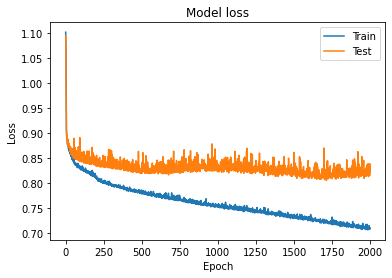

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

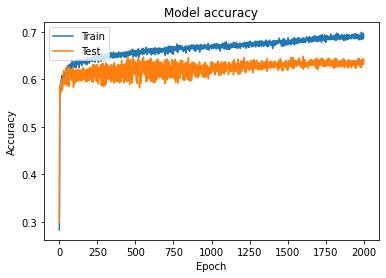

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
y_pred = model.predict(X_val)
#print(y_pred)
pred = []
for i in range(len(y_pred)):
    #print(y_pred[i])
    #print(np.argmax(y_pred[i]))
    pred.append(np.argmax(y_pred[i]))
print(pred)



[0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 

In [45]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_val)):
  #print(Y_test[i])
  test.append(np.argmax(Y_val[i]))
print(test)

[0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 

In [46]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
results = confusion_matrix(test, pred)
print('===================================')
print(results)
print('Accuracy Score :',accuracy_score(test, pred) )
print('Report : ')
print(classification_report(test, pred))

[[179  51  43]
 [ 68 205  26]
 [ 77  61 180]]
Accuracy Score : 0.6337078651685393
Report : 
              precision    recall  f1-score   support

           0       0.55      0.66      0.60       273
           1       0.65      0.69      0.67       299
           2       0.72      0.57      0.63       318

    accuracy                           0.63       890
   macro avg       0.64      0.64      0.63       890
weighted avg       0.65      0.63      0.63       890

